# Pell grants and Student loan repayment rates

One of the most troubling results I found during this analysis was the correlation between Pell grants and student loan repayment. Pell grants are federal grants that aid students from low income families in paying for college.  

As you can see, universities with large proportions of students receiving Pell grants tend to have poor student loan repayment rates, in spite of the fact that are receiving aid.  More concerning is the fact that the completion rate for these students is quite poor.

This chart calls into question the efficacy of Pell grants and whether they are doing more harm than good.  For example, these grants may be encouraging students who have limited chance of succeeding in college to attend (based on the low completion rates).  Since the maximum reward amount of these grants is barely enough to pay tuition at the cheapest colleges, students who receiving these grants almost certainly still have to take out student loans.  

[Text(0,0.5,'Repayment Rate'),
 Text(0.5,0,'Fraction of Students Receiving Pell Grants')]

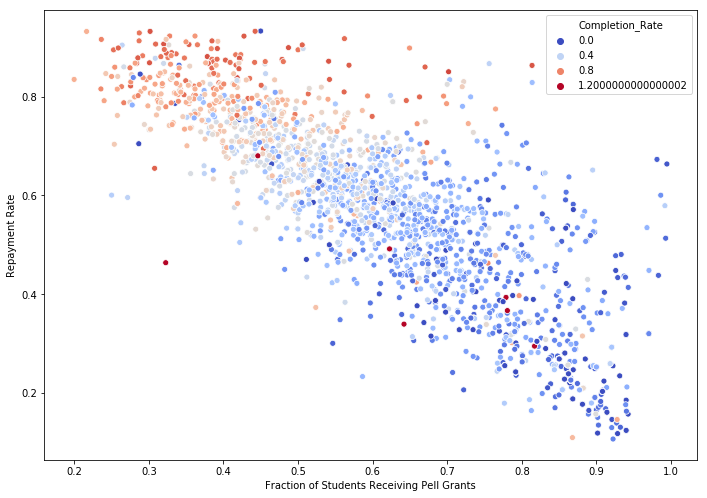

In [12]:
import os as os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib as plt
# Download the data
import wget
import os as os
import zipfile
url_1 = 'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip' 
url_2 = 'https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Treasury-Elements.csv'
def getdata(url):
    directory = os.getcwd()
    wget.download(url, directory)
    if url.endswith('.zip'):
        with zipfile.ZipFile("CollegeScorecard_Raw_Data.zip","r") as zip_ref:
            zip_ref.extractall(directory)
getdata(url_1)
scorecard_data = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',low_memory = False)
treasury_elements = pd.read_csv('Most-Recent-Cohorts-Treasury-Elements.csv')
%matplotlib inline
x = scorecard_data[['PELL_EVER', 'RPY_3YR_RT', 'C100_4']]
x = x.rename(index=str, columns={"C100_4": "Completion_Rate"})
x = x.apply(pd.to_numeric, errors='coerce')
a4_dims = (11.7, 8.27)
fig, ax = plt.pyplot.subplots(figsize=a4_dims)
y = sns.scatterplot(x="PELL_EVER", y="RPY_3YR_RT", hue = "Completion_Rate", palette= "coolwarm", data=x)
y.set(xlabel='Fraction of Students Receiving Pell Grants', ylabel='Repayment Rate')